# Preparing data

## Reading data -> Tokenization

In [16]:
import pandas as pd
df = pd.read_csv('data/sentiment.csv')

import jieba
df['token_text'] = df['text'].apply(lambda x:list(jieba.cut(x)))

df.head(10)

,tag,text,token_text
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]"
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]"
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！, , 不會, 是, 蒙牛, 乾, 的, 吧, , 嚴懲, 真凶, ！]"
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是..."
5,N,明明買了6本書，只到了3本，也沒有說是什麼原因，以後怎麼信的過？？？？？？？？？？？,"[明明, 買, 了, 6, 本書, ，, 只到, 了, 3, 本, ，, 也, 沒, 有, ..."
6,P,看了一下感覺還可以,"[看, 了, 一下, 感覺還, 可以]"
7,P,散熱還不錯，玩遊戲cpu溫度和硬碟溫度都在56以下， 速度很好，顯示卡也不錯,"[散熱, 還不錯, ，, 玩遊戲, cpu, 溫度, 和, 硬碟, 溫度, 都, 在, 56..."
8,P,外觀好看，白色的自己貼紙也方便，vista執行起來速度也還不錯.屬於主流配置了。一般用用可以的,"[外觀, 好看, ，, 白色, 的, 自己, 貼紙, 也, 方便, ，, vista, 執行..."
9,N,水超級小 用的時候還要先修理一下花灑 售後還說是水壓問題 說本來標配都是這樣還要自己重新換一個,"[水超級, 小, , 用, 的, 時候, 還要, 先, 修理, 一下, 花灑, , 售後..."


## Removing Punctuation

In [36]:
import unicodedata # for removing Chinese puctuation
def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out


In [24]:
df['cleaned'] = df['token_text'].apply(remove_punc_by_unicode)
# df['cleaned'] = df['clean'].apply(remove_stopWords)
df


,tag,text,token_text,cleaned
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當快, ，, 第三次, 光顧, 啦]","[店家, 很, 給力, 快遞, 也, 是, 相當快, 第三次, 光顧, 啦]"
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,...","[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 指紋, 收集器, ..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的, ！]","[不錯, 在, 同等, 檔次, 酒店, 中應, 該, 是, 值得, 推薦, 的]"
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！, , 不會, 是, 蒙牛, 乾, 的, 吧, , 嚴懲, 真凶, ！]","[哎, 不會, 是, 蒙牛, 乾, 的, 吧, 嚴懲, 真凶]"
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是...","[空, 尤其, 是, 三立, 電視, 臺, 女主播, 做, 的, 序, 尤其, 無趣, 像是..."
...,...,...,...,...
6383,P,價效比高、記憶體大、功能全，螢幕超清晰,"[價效, 比高, 、, 記憶體, 大, 、, 功能, 全, ，, 螢幕超, 清晰]","[價效, 比高, 記憶體, 大, 功能, 全, 螢幕超, 清晰]"
6384,N,你太狠了… 告訴你他們不會喧譁的人，肯定是蒙牛喝多了,"[你, 太狠, 了, …, , 告訴, 你, 他們, 不會, 喧, 譁, 的, 人, ，,...","[你, 太狠, 了, 告訴, 你, 他們, 不會, 喧, 譁, 的, 人, 肯定, 是, 蒙..."
6385,N,醫生居然買了蒙牛，我是喝呢還是不喝呢還是不喝呢？,"[ , 醫生, 居然, 買, 了, 蒙牛, ，, 我, 是, 喝, 呢, 還是, 不, 喝,...","[醫生, 居然, 買, 了, 蒙牛, 我, 是, 喝, 呢, 還是, 不, 喝, 呢, 還是..."
6386,N,我只想說 夾蒙牛是不對的 販賣毒品是犯罪行為,"[我, 只, 想, 說, , 夾, 蒙牛, 是, 不, 對, 的, , 販賣, 毒品, ...","[我, 只, 想, 說, 夾, 蒙牛, 是, 不, 對, 的, 販賣, 毒品, 是, 犯罪,..."


# Feature selection

## tfidf vectorization
- https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
- https://blog.csdn.net/blmoistawinde/article/details/80816179
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [25]:
documents = [" ".join(doc) for doc in df['cleaned']]
documents[:10]

['店家 很 給力 快遞 也 是 相當快 第三次 光顧 啦',
 '這樣 的 配置 用 Vista 系統 還是 有點 卡 指紋 收集器 沒送 原裝 滑鼠 還 需要 自己 買 不太好',
 '不錯 在 同等 檔次 酒店 中應 該 是 值得 推薦 的',
 '哎 不會 是 蒙牛 乾 的 吧 嚴懲 真凶',
 '空 尤其 是 三立 電視 臺 女主播 做 的 序 尤其 無趣 像是 硬 湊 那麼 多字',
 '明明 買 了 6 本書 只到 了 3 本 也 沒 有 說 是 什麼 原因 以後怎麼 信的過',
 '看 了 一下 感覺還 可以',
 '散熱 還不錯 玩遊戲 cpu 溫度 和 硬碟 溫度 都 在 56 以下 速度 很 好 顯示 卡 也 不錯',
 '外觀 好看 白色 的 自己 貼紙 也 方便 vista 執行 起來 速度 也 還不錯 屬 於 主流 配置 了 一般 用 用 可以 的',
 '水超級 小 用 的 時候 還要 先 修理 一下 花灑 售後還 說 是 水壓 問題 說 本來 標配 都 是 這樣 還要 自己 重新 換一個']

- 当然有些时候我们还是要过滤掉一些无意义的词，下面有些别的参数也可以帮助我们实现这一目的：`max_df/min_df: [0.0, 1.0]`内浮点数或正整数, 默认值=`1.0`。当设置为浮点数时，过滤出现在超过max_df/低于min_df比例的句子中的词语；正整数时,则是超过max_df句句子。这样就可以帮助我们过滤掉出现太多的无意义词语，如下面的"我"就被过滤（虽然这里“我”的排比在文学上是很重要的）。

In [94]:
with open("data/stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]

from sklearn.feature_extraction.text import TfidfVectorizer

# fit(doc)
model_tfidf = TfidfVectorizer(max_df=0.05,
                              # token_pattern=r"(?u)\b\w+\b", 
                              # max_features = 2000,
                              stop_words=stopwords).fit(documents)


# transform(doc) to document-term matrix
# X: Documnet-term matrix (rows, colomns)

X_tfidf = model_tfidf.transform(documents)
print(type(X_tfidf))
print(X_tfidf.shape)


# Show transform(X_tfidf) result
model_tfidf.inverse_transform(X_tfidf)[:20]

<class 'scipy.sparse.csr.csr_matrix'>
(6388, 11959)


[array(['給力', '第三次', '相當快', '快遞', '店家', '光顧'], dtype='<U24'),
 array(['需要', '配置', '系統', '滑鼠', '沒送', '有點', '收集器', '指紋', '原裝', '不太好',
        'vista'], dtype='<U24'),
 array(['檔次', '推薦', '同等', '值得', '中應'], dtype='<U24'),
 array(['真凶', '嚴懲'], dtype='<U24'),
 array(['電視', '無趣', '尤其', '女主播', '多字', '像是', '三立'], dtype='<U24'),
 array(['本書', '明明', '只到', '原因', '信的過', '以後怎麼'], dtype='<U24'),
 array(['感覺還', '一下'], dtype='<U24'),
 array(['顯示', '還不錯', '速度', '硬碟', '玩遊戲', '溫度', '散熱', '以下', 'cpu', '56'],
       dtype='<U24'),
 array(['配置', '還不錯', '速度', '貼紙', '白色', '方便', '好看', '外觀', '執行', '主流',
        'vista'], dtype='<U24'),
 array(['重新', '還要', '花灑', '水超級', '水壓', '標配', '本來', '換一個', '問題', '售後還',
        '修理', '一下'], dtype='<U24'),
 array(['還非', '結帳', '知道', '每首', '房間點', '懶得', '廢話', '太差'], dtype='<U24'),
 array(['霸氣', '覺得', '特倫蘇', '牛奶', '外露'], dtype='<U24'),
 array(['系統', '真難裝', '版本', '根本', '外觀', '剛買', 'xp', 'linux', 'ghost', '100'],
       dtype='<U24'),
 array(['配置', '用剛', '檔次', '有紅色', '很漂亮', '實惠', '女

## w2v

In [66]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(documents)]
model = Doc2Vec(tagged_documents, vector_size=100, window=2, min_count=1, workers=4)

In [111]:
import scipy
doc_vector = [model.infer_vector(doc) for doc in df['cleaned']]
X_w2v = scipy.sparse.csr_matrix(doc_vector)
X_w2v.shape

(6388, 100)

## with chi.square feature selector
- https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1

In [116]:
from sklearn import datasets
X, y=datasets.load_wine(return_X_y=True)
X
X.shape

(178, 13)

In [121]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(score_func=chi2, k=100)
y = df.iloc[:, 0]
fit = selector.fit(X_tfidf, y)
fit.scores_

array([0.15789817, 0.01763186, 0.45339518, ..., 0.32014909, 0.00125132,
       0.33394599])

In [125]:
X_chi2=selector.fit_transform(X_tfidf, y)
X_chi2

<6388x100 sparse matrix of type '<class 'numpy.float64'>'
	with 7458 stored elements in Compressed Sparse Row format>

# train_test_split()

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Params
    - **test_size float or int, default=None**: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
    - **train_size float or int, default=None**: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.
    - **random_stateint, RandomState instance or None, default=None**: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.
    - **shufflebool, default=True**: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
    - **stratifyarray-like, default=None**: If not None, data is split in a stratified fashion, using this as the class labels. Read more in the User Guide.

In [126]:
## Restoring label y
y = df.iloc[:, 0]
print(y)

# split train and test data
from sklearn.model_selection import train_test_split
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf.toarray(), y, test_size=0.3)
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v.toarray(), y, test_size=0.3)
X_chi2_train, X_chi2_test, y_chi2_train, y_chi2_test = train_test_split(X_chi2.toarray(), y, test_size=0.3)

print(X_tfidf_train.shape)
print(X_w2v_train.shape)
print(X_chi2_train.shape)

0       P
1       N
2       P
3       N
4       N
       ..
6383    P
6384    N
6385    N
6386    N
6387    P
Name: tag, Length: 6388, dtype: object
(4471, 11959)
(4471, 100)
(4471, 100)


# Modeling

## Naive Bayes

In [77]:
# Naive Bayes 
# X.toarray() is to avoid sparse matrix
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_tfidf_train, y_tfidf_train)

GaussianNB()

## XGBoost
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_tfidf_train, y_tfidf_train)

# Prediction

In [156]:
y_tfidf_pred = classifier.predict(X_tfidf_test)

# Evaluation

In [159]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
accuracy = accuracy_score(y_tfidf_test, y_tfidf_pred)
print(cr)

              precision    recall  f1-score   support

           N       0.72      0.88      0.79      1002
           P       0.82      0.62      0.71       915

    accuracy                           0.76      1917
   macro avg       0.77      0.75      0.75      1917
weighted avg       0.77      0.76      0.75      1917



## Explaining classification_report
- https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn
- The **recall** means "how many of this class you find over the whole number of element of this class"
- The **precision** will be "how many are correctly classified among that class"
- The **f1-score** is the harmonic mean between precision & recall
- The **support** is the number of occurence of the given class in your dataset (so the case has 1004 of class N and 913 of class P, which is a almost balanced dataset.

Notes
- Precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.
- We should not compare the precision and the recall over two classes. This only means the classifier is better to find class 0 over class 1.


```
# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.80      0.92      0.85      1004
#            P       0.89      0.74      0.81       913
#     accuracy                           0.84      1917
#    macro avg       0.85      0.83      0.83      1917
# weighted avg       0.84      0.84      0.83      1917
```

# Overall Evaluating

In [109]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

def train_model(classifier, train, train_label, test, test_label):
    classifier.fit(train, train_label)
    pred_label = classifier.predict(test)
    return classification_report(test_label, pred_label)

In [ ]:
## Time-consumed
print(train_model(RandomForestClassifier(), X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test))
# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.82      0.83      0.83      1004
#            P       0.81      0.80      0.81       913
#     accuracy                           0.82      1917


print(train_model(RandomForestClassifier(), X_w2v_train, y_w2v_train, X_w2v_test, y_w2v_test))

# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.60      0.76      0.67       951
#            P       0.68      0.50      0.58       966
#     accuracy                           0.63      1917

In [106]:
## time-consumed VERY!!
# print(train_model(GradientBoostingClassifier(), X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test))

# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.69      0.92      0.79      1004
#            P       0.86      0.55      0.67       913
#     accuracy                           0.74      1917
#    macro avg       0.78      0.74      0.73      1917
# weighted avg       0.77      0.74      0.73      1917


              precision    recall  f1-score   support

           N       0.69      0.92      0.79      1004
           P       0.86      0.55      0.67       913

    accuracy                           0.74      1917
   macro avg       0.78      0.74      0.73      1917
weighted avg       0.77      0.74      0.73      1917



In [107]:
from sklearn import svm
print(train_model(svm.SVC(), X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test))

# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.80      0.92      0.85      1004
#            P       0.89      0.74      0.81       913
#     accuracy                           0.84      1917
#    macro avg       0.85      0.83      0.83      1917
# weighted avg       0.84      0.84      0.83      1917

              precision    recall  f1-score   support

           N       0.80      0.92      0.85      1004
           P       0.89      0.74      0.81       913

    accuracy                           0.84      1917
   macro avg       0.85      0.83      0.83      1917
weighted avg       0.84      0.84      0.83      1917



In [149]:
# with original tfidf
print(train_model(LogisticRegression(), X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test))

# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.79      0.89      0.84      1002
#            P       0.86      0.75      0.80       915
#     accuracy                           0.82      1917
#    macro avg       0.83      0.82      0.82      1917
# weighted avg       0.83      0.82      0.82      1917

# tfidf + chi2 feature selection
print(train_model(LogisticRegression(), X_chi2_train, y_chi2_train, X_chi2_test, y_chi2_test))

# ---------------------------------------------------------
#               precision    recall  f1-score   support
#            N       0.73      0.88      0.80      1005
#            P       0.83      0.63      0.72       912
#     accuracy                           0.76      1917
#    macro avg       0.78      0.76      0.76      1917
# weighted avg       0.77      0.76      0.76      1917

              precision    recall  f1-score   support

           N       0.79      0.89      0.84      1002
           P       0.86      0.75      0.80       915

    accuracy                           0.82      1917
   macro avg       0.83      0.82      0.82      1917
weighted avg       0.83      0.82      0.82      1917

              precision    recall  f1-score   support

           N       0.73      0.88      0.80      1005
           P       0.83      0.63      0.72       912

    accuracy                           0.76      1917
   macro avg       0.78      0.76      0.76      1917
weighted avg       0.77      0.76      0.76      1917



# ROC
- https://www.dezyre.com/recipes/plot-roc-curve-in-python

In [139]:
classifier = LogisticRegression().fit(X_tfidf_train, y_tfidf_train)
y_score = classifier.predict_proba(X_tfidf_test)[:,1]
y_score

array([0.65396794, 0.18828281, 0.03479667, ..., 0.88646897, 0.46039212,
       0.34383811])

In [142]:
y_test = [0 if y == "N" else 1 for y in y_tfidf_test]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [143]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.9105995658955314


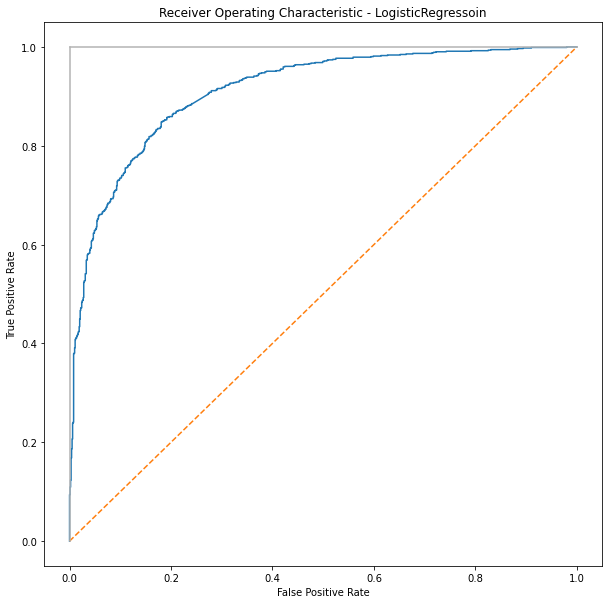

In [146]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LogisticRegressoin')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## by `plot_roc_curve()`
- `plot_roc_curve()`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
- plot roc curve with cross-validation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

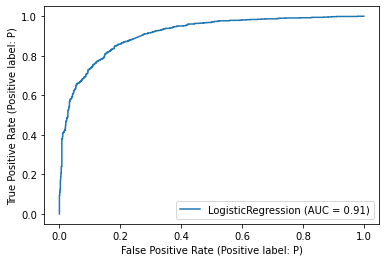

In [148]:
metrics.plot_roc_curve(classifier, X_tfidf_test, y_tfidf_test)  
plt.show()